# Introduction:


"Not all neighborhoods are created equal". In this project, we are tasked with finding out the "best" neighborhood in Pittsburgh. To find this out, we must use a metric of our choosing that defines "bestness". When considering what defines "bestness", and after pouring over the datasets provided to us, one metric stood out among all the rest: the number or currently logged and approved parking permits per neighborhood. Clearly a neighborhood with a high number of parking permits would be the obvious best choice to determine the best neighborhood in Pittsburgh. When people park, people are happy. When I drive home from class, I'm not thinking "Gee, I sure hope I can find a spot thats within a mile of my house!". No no no, I'm thinking, "Wow! It sure is great how many parking permits they hand out for people in my neighborhood! This isn't congested at all!"

# The Metric:

As mentioned above, the metric I have chosen to go with is the number of parking permits approved per neighborhood. To measure this, I decided it would be easiest to just simply count over how many times each neighborhood appears, as the dataset only logged approved parking permits. This ensured that I would not run into any permits that were unapproved, or any permits that were approved but weren't logged.

# The Best Neighborhood:

When trying to find out the number of approved parking permits in the area, I first wanted to get an idea of what areas had the highest concentration of parking permits. To achieve this goal, I used the .value_counts() function in Pandas to display the full range of parking permits.

In [7]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np

In [15]:
parking = pd.read_csv("permit_parking.csv", sep=",")
parking['neighborhood'].value_counts()

SHADYSIDE                      6
SQUIRREL HILL NORTH            5
BLOOMFIELD                     4
SOUTH SIDE FLATS               4
WEST OAKLAND                   3
NORTH OAKLAND                  3
CRAWFORD ROBERTS               2
SOUTH OAKLAND                  2
ALLEGHENY WEST                 2
HOMEWOOD SOUTH                 2
FRIENDSHIP                     2
EAST ALLEGHENY                 2
                               2
LAWRENCEVILLE                  2
CENTRAL NORTHSIDE              2
BLUFF                          1
BEECHVIEW                      1
GARFIELD                       1
CENTRAL OAKLAND                1
POINT BREEZE                   1
MT WASHINGTON                  1
SQURREL HILL NORTH &  SOUTH    1
Name: neighborhood, dtype: int64

Shocking, right? So few parking permits, and yet you see cars everywhere in these neighborhoods! How could this be? However, this alone would not be a good enough representation of the dataset. From just the list alone, I was able to get a good idea of what a heatmap might look like, but it would not be good enough on its own to give me the full picture.

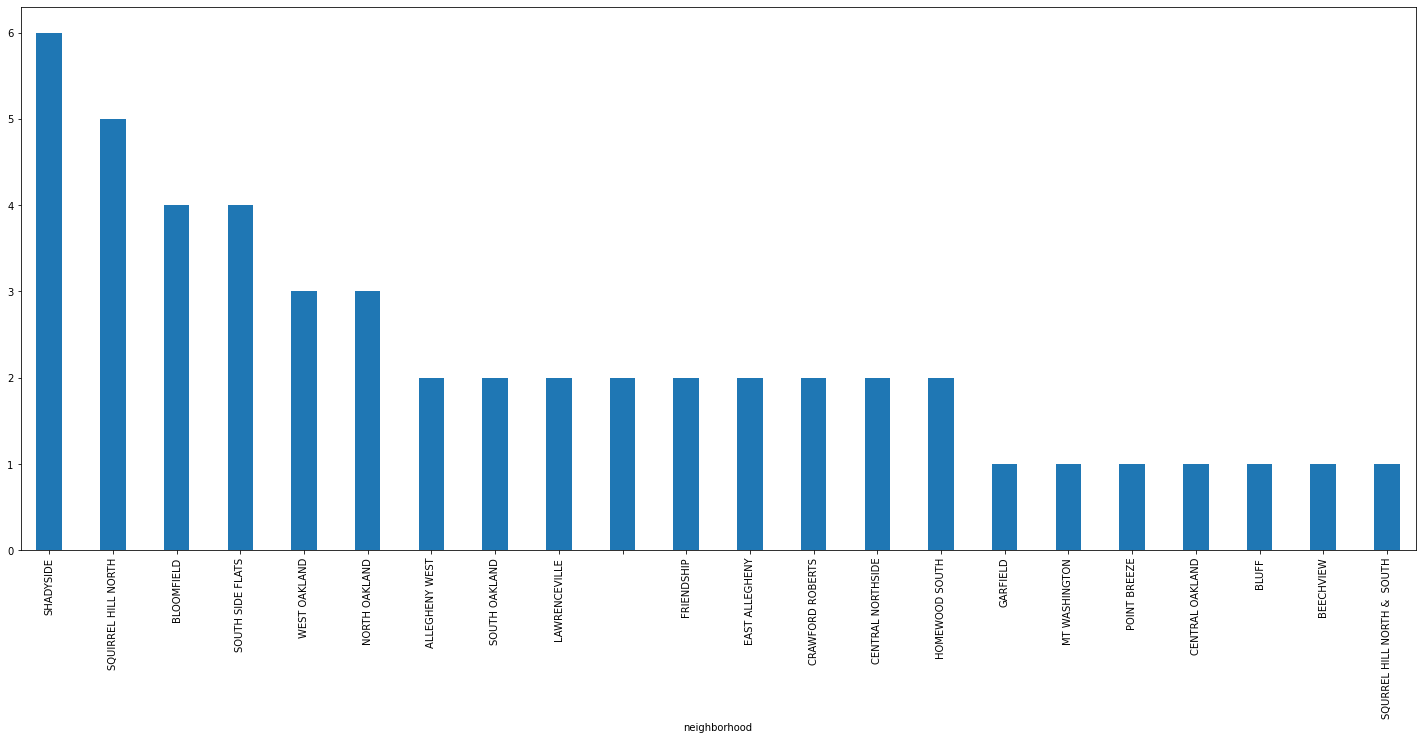

In [5]:
parking = parking.groupby('neighborhood').size()
parking_desc = parking.sort_values(ascending=False)
parking_desc[:78].plot(kind="bar", width=0.4, figsize=(25,10))

# Determining a Community’s Needs:

A community can be critiqued in many different aspects, whether it be by the number of restaurants present, whether there are parks or green space, or if it is home to recreational spaces such as gyms or libraries. It is important to consider how the people of a community are served and cared for; a good way to judge that is by the healthcare presence. A good community should have a large variety of hospitals and primary care facilities available to provide adequate services to the people in the area. 

# The Metric:

When deciding on the best neighborhood, I think the only metric that can be used is amount of hospitals in a given neighborhood. Specifically, UPMC hospitals.

In [9]:
hospitals = pd.read_csv("https://data.wprdc.org/dataset/d2289ea6-b1ef-4acb-afa7-028cccb7fb18/resource/2d9db439-8f85-4b6d-ab92-423a2ef9c7d9/download/data-hospitallocations.csv", sep=",")
hospitals.drop(hospitals[hospitals['Facility'].str.contains('UPMC') == False].index, inplace = True)
hospitals.head()

,Facility,Address,Y,X
0,UPMC Children's,"4401 Penn Avenue Pittsburgh, PA 15224",40.467315,-79.953590
1,UPMC Magee,"300 Halkett Street Pittsburgh, PA 15213",40.436889,-79.960700
2,UPMC McKeesport,"1500 5th Avenue McKeesport, PA 15132",40.351343,-79.849457
3,UPMC Mercy,"1400 Locust Street Pittsburgh, PA 15219",40.436137,-79.985285
4,UPMC Passavant,"9100 Babcock Boulevard Pittsburgh, PA 15237",40.573319,-80.014525


# The Best Neighborhood:

In Allegheny County, there are many different types of hospitals. Pittsburgh hospitals are renowned for having some of the most advanced departments in Pennsylvania and the surrounding Midwest/Northeast region. According to the data sets available on WPRDC, Oakland has the highest number of hospitals and primary care facilities out of all Pittsburgh Metro neighborhoods, coming in strong at 31(3 of which are hospitals). Oakland far outnumbers the competition, with Shadyside coming in at second with 17 (1 hospital), the South side at 12 (no hospitals, only primary care facilities), the North Side at 10 (1 hospital), Downtown at 8 (again, no hospitals, only primary care facilities), and Lawrenceville at an embarrassingly low count of 7 (1 hospital).

![title](Hospital.png)

**Allegheny county has more and higher quality hospitals around the community than any other neighborhood too.**

# Community Protection:

When people want to know which neighborhood is the "best," it might be challenging to start how they could learn how even to determine. So in this project, we are given directions to determine which is the "best" neighborhood in Pittsburgh. There are many options for each of us to choose and analyze a conclusion based on their dataset. I have been thinking over it and am unsure which is significant to consider in selecting a good neighborhood. Indeed, I feel like a "best" neighborhood should provide protection whenever there is bad weather or lack of water, etc. Green Infrastructure is what I think is essential to use for finding the "best" neighborhood in Pittsburgh.

# The Metric:

As I have mentioned in the introduction, to see whether a neighborhood provides green infrastructure is what I will go with for this project. This metric will to shown by the color labels on the map rather than on the data. On the map, I will be able to figure out where Pittsburgh provides the most.

In [5]:
green = pd.read_csv("https://data.wprdc.org/datastore/dump/317041e9-2289-48aa-a602-0dc6494fb6e3?q=&sort=_id+asc&fields=field%2Cdescription%2Cnotes&filters=%7B%7D&format=csv", sep=",")
green.head(10)

,field,description,notes
0,OBJECTID,unique id for geographic feature,NaN
1,Id,NaN,NaN
2,BMP,Best Management Practice,storage infrastructure opportunity sites
3,Shape_Leng,length of geographic feature,used internally by GIS software
4,Shape_Area,area of geographic feature,used by GIS software


# The Best Neighborhood:

To get a better visualization of which neighborhoods have green infrastructure, I have provided a geoJSON map of Allegheny County.

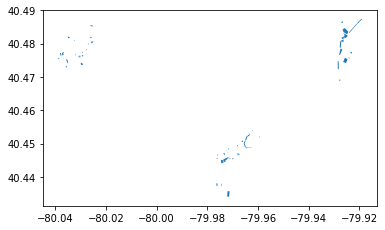

In [10]:
df = gpd.read_file("https://data.wprdc.org/dataset/67abfe18-1906-478d-8970-da6981f5022f/resource/4f2b0784-274a-4b4b-809f-ce5ca22a69df/download/cwa41o27m19giconcept.geojson")
df.plot()

# Conclusions:

**ZIPU:** Quantity isn’t everything though, and it is important to evaluate the quality of these facilities. Even so, Oakland ranks supreme as it is home to UPMC Presbyterian, UPMC Magee, and the VA Pittsburgh. UPMC Presbyterian is ranked the #1 hospital in Pittsburgh, and on its campus contains UPMC Montefiore and UPMC Western Psychiatric. This campus of hospitals is renowned for specializing in trauma services, esophageal and lung surgery, heart and vascular care, neurology and neurosurgery, transplant services and behavioral health. UPMC Magee specializes in women and infant care and the VA Pittsburgh offers specialized help to veterans and is known  for medicine, surgery, neurology, and critical care. The hospitals of Oakland offer a wide variety of top-notch services to its community, making health care accessible to all people, regardless of age, sex, gender, and ability status. The hospitals of Shadyside, the North Side, and Lawrenceville do not even begin to come close to this variety.

**CONNOR:** Judging from the data, we can tell that the almighty Shadyside is the best neighborhood in Pittsburgh, based on its parking permit approval. Squirrel Hill North takes a close second, with Bloomfield in third. Interestingly enough, these neighborhood all happen to exist right next to each other. If you walked in a straight line from Squirrel Hill North to Bloomfield, the only other neighborhood you would pass through is Shadyside. Curiously enough, Shadyside has both Forbes Ave. and Fifth Ave. running through it, which are two of the busiest streets in Pittsburgh. These things considered, its no wonder the best neighborhoods to live in also happen to have the busiest and the smallest streets. If you hate parking, try your best to avoid Oakland, Bluff, Beechview, or Squirrel Hill South.

**LIYA:** In my opinion, the neighborhood between Middle Hill to Upper Hill would be consider as "best". Because I can't really determine the specific neighborhood, I would just label the "bestness" in between the two.